# SalesProphet: Time Series Forecasting for Store Sales
<br>



## Project Overview

Welcome to the Store Sales Forecasting project! In this project, I'll be working with data from Corporación Favorita, a large grocery retailer in Ecuador. The goal is to predict the sales of various product families in different Favorita stores using time-series forecasting techniques.


## Mission

The mission in this project is to build a model that can accurately predict the sales of different product families at Favorita stores. By doing so, the aim is to help the grocery retailer optimize their inventory management, reduce food waste, and enhance customer satisfaction.

**Evaluate Your Predictions:** https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview/evaluation)
## Why is This Important?

Think about how challenging it is for a grocery store to manage their inventory. If a store overstocks, they might end up with perishable goods that go to waste. On the other hand, underestimating demand can lead to popular items running out, disappointing customers, and lost revenue. Accurate forecasting is crucial to strike the right balance.
## What's in the Data?

The data includes information about:

  *  **Stores:** Each store's location, type, and cluster.
  *  **Products:** Different types of products (product families) sold.
  *  **Sales:** Historical sales data for each product family at each store.
  *  **Promotions:** Whether a product family was being promoted at a store.
  *  **Oil Prices:** Daily oil prices, which can influence economic conditions.
  *  **Holidays and Events:** Information about holidays and special events.

**Access the Data:** https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data)
## How Success Will Be Measured

To evaluate the model's performance, I'll use a metric called the Root Mean Squared Logarithmic Error (RMSLE). This metric helps us understand how well predictions align with the actual sales values.
## Potential Impact

By building an accurate sales forecasting model, I contribute to reducing food waste, improving inventory management, and ultimately enhancing the shopping experience for customers. The insights gained from this project can have a real-world impact on the operations of brick-and-mortar grocery stores.
Next Steps

Let's create a model that empowers grocery stores to make more informed decisions about their inventory and sales strategies.

<br>
<br>
<div style="border-top: 1px solid;"></div>

 
## Importing the necessary libraries

These libraries include tools for data manipulation (numpy, pandas), visualization (matplotlib, seaborn), preprocessing (OneHotEncoder, ColumnTransformer), and modeling (LogisticRegression, KNeighborsClassifier, etc.). These tools provide the foundation for data analysis, feature engineering, and building predictive models.

In [1]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Import machine learning algorithms for Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Model Evaluations
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")

<br>
<br>
<div style="border-top: 1px solid;"></div>


## Data Analysis
### Data Loading

I begin by loading the necessary datasets using pandas. These datasets will serve as the foundation for my analysis and modeling.


In [3]:
# Load the datasets using pandas
train_data = pd.read_csv("sales-time-forecast-datasets/train.csv", low_memory=True)
holiday_data = pd.read_csv("sales-time-forecast-datasets/holidays_events.csv")
oil_data = pd.read_csv("sales-time-forecast-datasets/oil.csv")
stores_data = pd.read_csv("sales-time-forecast-datasets/stores.csv")
transactions_data = pd.read_csv("sales-time-forecast-datasets/transactions.csv")

### Exploring Datasets

Now, let's explore each dataset to understand their contents, structure, and relationships.

#### Train Data

The `train_data` dataset contains information about product sales at Favorita stores in Ecuador.

- **id:** Unique identifier for each record.
- **date:** The date of the sales data.
- **store_nbr:** Store number where the product was sold.
- **family:** Type of product family.
- **sales:** Total sales for a product family at a particular store on the given date.
- **onpromotion:** Number of items in a product family being promoted at the store on the given date.


In [4]:
train_data.loc[:4]

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [5]:
# Display basic information about the train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


#### Holiday Data

The `holiday_data` dataset includes information about holidays and events.

  *  **date:** The date of the holiday or event.
  *  **type:** Type of holiday or event.
  *  **locale:** Locale type (e.g., local, regional).
   * **locale_name:** Name of the locale.
   * **description:** Description of the holiday or event.
   * **transferred:** Indicates if the holiday was transferred to another date.

In [6]:
holiday_data.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
# Display basic information about the holiday data
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB






#### Oil Data

The `oil_data` dataset provides daily oil price data.

  *  **date:** The date of the oil price data.
  *  **dcoilwtico:** Daily oil price (WTI crude oil).

In [8]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [9]:
# Display basic information about the oil data
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


#### Stores Data

The `stores_data` dataset contains metadata about stores.

  *  **store_nbr:** Store number.
  *  **city:** City where the store is located.
  *  **state:** State where the store is located.
  *  **type:** Type of store.
  *  **cluster:** Grouping of similar stores.

In [10]:
stores_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [11]:
# Display basic information about the stores data
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


#### Transactions Data

The `transactions_data` dataset includes information about transactions at stores.

  *  **date:** The date of the transaction data.
  *  **store_nbr:** Store number.
  *  **transactions:** Number of transactions at the store on the given date.

In [12]:
transactions_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [13]:
# Display basic information about the transactions data
transactions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


### Visualizing Sales by Product Family

The provided code snippet generates a bar plot that showcases the distribution of total sales among different product families.

**What the Plot Shows:**

The plot displays product family names on the x-axis and the total sales for each family on the y-axis. Each bar's height represents the sum of sales for a specific product family. The family labels have been formatted to start with a capitalized first letter and lowercase for the rest of the letters, enhancing readability.

This visualization allows us to quickly grasp the sales performance of various product families and identify which families contribute the most to the overall sales. It provides a valuable overview of how different product categories perform in terms of sales.


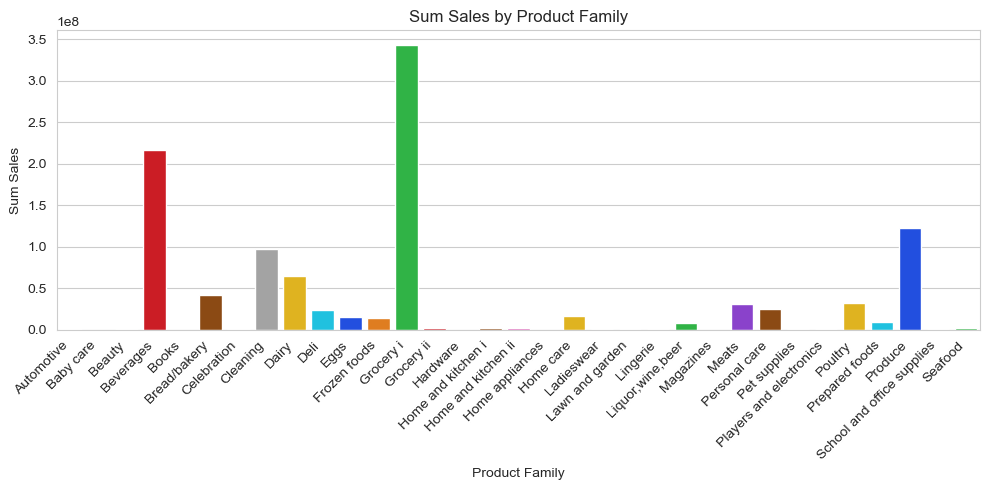

In [14]:
sns.set_style("whitegrid")

# Grouping 'sales' by 'family' and calculating the mean sales for each family
sales_by_family = train_data.groupby('family')['sales'].sum()


# Converting the family names to lowercase with first letter capitalized
family_labels = [f'{family[0]}{family[1:].lower()}' for family in sales_by_family.index]

# Creating a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=family_labels, y=sales_by_family.values, palette="bright")
plt.xticks(rotation=45, ha="right")
plt.xlabel('Product Family')
plt.ylabel('Sum Sales')
plt.title('Sum Sales by Product Family')
plt.tight_layout();

### Monthly Sales Trend Visualization

The provided code snippet generates a line plot that visually presents the trend of monthly sales over time using the 'Train Data' dataset.

**What the Plot Shows:**

The plot displays a blue line with circular markers that represents the trend of monthly sales. Each point on the line corresponds to a month, and its vertical position on the plot indicates the total sales for that month. By observing the direction and slope of the line, you can quickly identify whether sales are increasing, decreasing, or fluctuating over time. This visualization provides valuable insights into the sales patterns and trends within the dataset's timeframe.

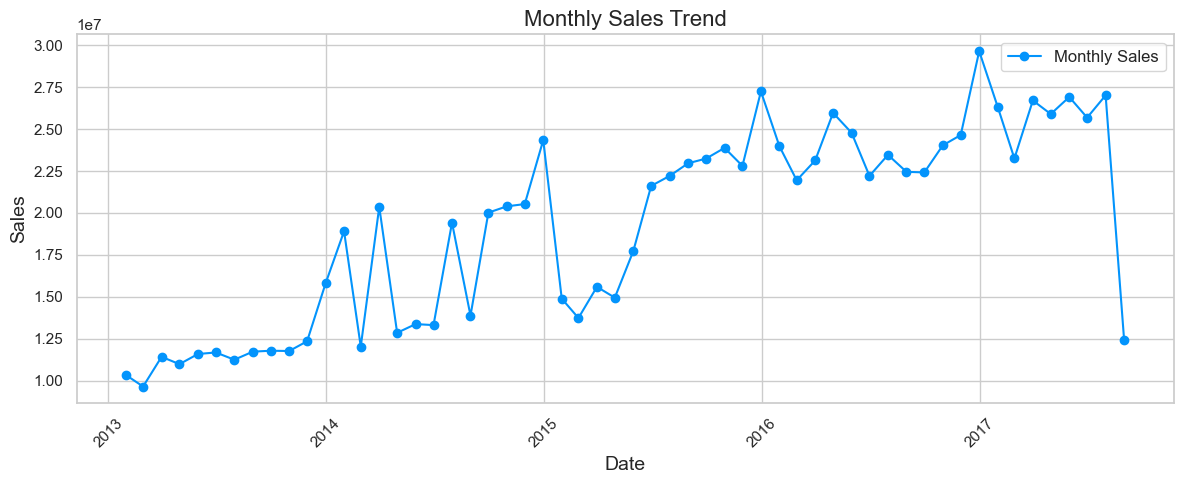

In [15]:
# Train Data: Line plot for sales over time (downsampled to monthly)
train_data['date'] = pd.to_datetime(train_data['date'])
train_data_monthly = train_data.resample('M', on='date').sum()

# Set up the plot figure with enhanced aesthetics
plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")  

# Plotting the data with markers and custom color
plt.plot(train_data_monthly.index, train_data_monthly['sales'], marker='o', color="#0394fc", label='Monthly Sales')

# Adding title and axis labels with adjusted font sizes
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)

plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout();

### Holiday Counts Over Time

The provided code generates a line plot to showcase the fluctuation in holiday counts over time using the 'Holiday Data' dataset.

**What the Plot Shows:**

The plot visually represents the changes in the count of holidays for each month over the dataset's time span. The x-axis displays time (in months), and the y-axis represents the holiday count. Each orange marker on the line corresponds to a specific month's holiday count. By examining the line's shape and markers, you can identify any patterns, spikes, or trends in holiday occurrences throughout the dataset. This visualization provides insights into the distribution of holidays over time.

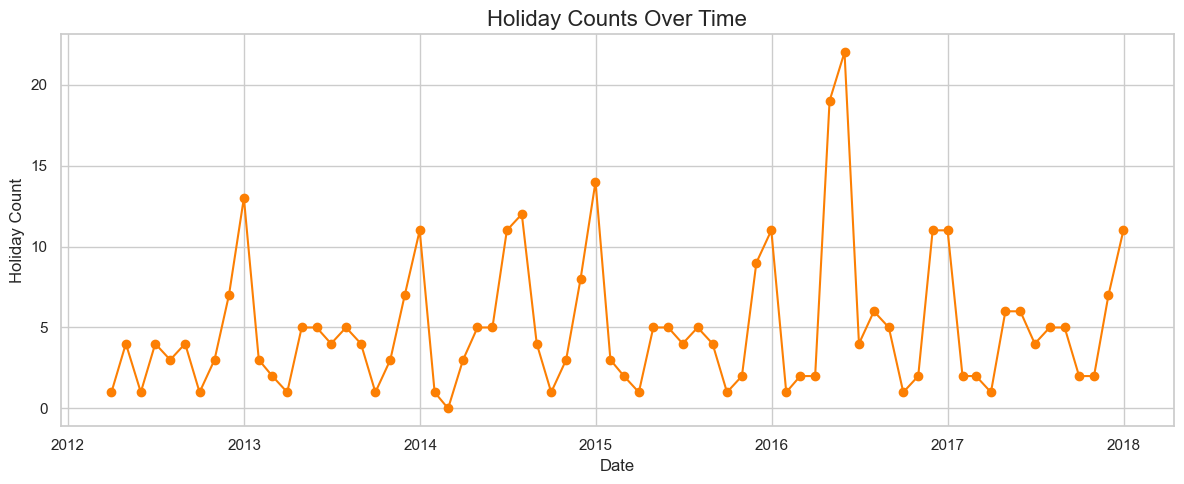

In [16]:
# Convert the 'date' column to datetime format
holiday_data['date'] = pd.to_datetime(holiday_data['date'])

# Count of Holidays Over Time (Line Plot)
plt.figure(figsize=(12, 5))
holiday_count = holiday_data.resample('M', on='date').size()
plt.plot(holiday_count.index, holiday_count, marker='o', color='#fc7f03')
plt.xlabel('Date')
plt.ylabel('Holiday Count')
plt.title('Holiday Counts Over Time', fontsize=16)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



## Exploring Holiday Types and Locale Distribution

The provided code generates subplots to visually analyze the distribution of holiday types and the locale-wise distribution of holidays using the 'Holiday Data' dataset.

#### Subplot 1: Distribution of Holiday Types

In the top-left subplot, the distribution of different holiday types is displayed using a count plot. This plot illustrates the frequency of each holiday type. The x-axis represents the various holiday types, while the y-axis represents the count of each type. The title "Distribution of Holiday Types" emphasizes the purpose of this visualization.

#### Subplot 2: Locale-wise Distribution of Holidays

The top-right subplot showcases the distribution of holidays across different locales. This is achieved through another count plot. Here, the x-axis represents the locales, and the y-axis represents the count of holidays in each locale. The title "Locale-wise Distribution of Holidays" provides context for understanding the content of the plot.3 e

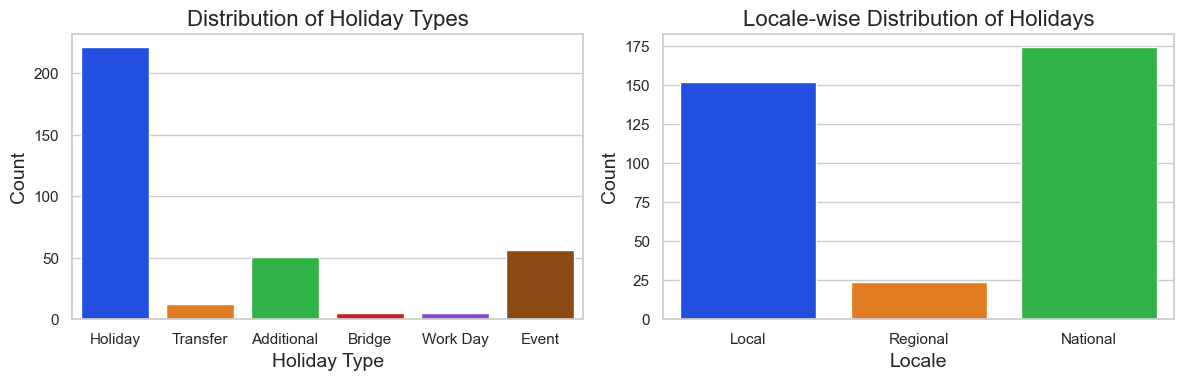

In [17]:
# Create subplots for holiday types and locale-wise distribution
plt.figure(figsize=(12, 7))

# Subplot 1: Distribution of Holiday Types
plt.subplot(2, 2, 1)
sns.countplot(data=holiday_data, x='type', palette="bright")
plt.title('Distribution of Holiday Types', fontsize=16)
plt.xlabel('Holiday Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)

# Subplot 2: Locale-wise Distribution of Holidays
plt.subplot(2, 2, 2)
sns.countplot(data=holiday_data, x='locale', palette='bright')
plt.title('Locale-wise Distribution of Holidays', fontsize=16)
plt.xlabel('Locale', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)

# Adjust layout for subplots
plt.tight_layout()

# Show the subplots
plt.show()

### Monthly Oil Price Trend Visualization

The code provided generates a line plot to visualize the trend of monthly oil prices using the 'Oil Data' dataset.

#### What the Plot Shows:
The plot depicts the trend of monthly oil prices over time. The x-axis represents the months, and the y-axis represents the average oil price for each month. The line plot displays the fluctuations in oil prices, and the circular markers highlight specific data points. By observing the line's movement, you can identify any notable patterns or changes in oil prices throughout the dataset's timeline. This visualization provides insights into the volatility and direction of oil price trends.

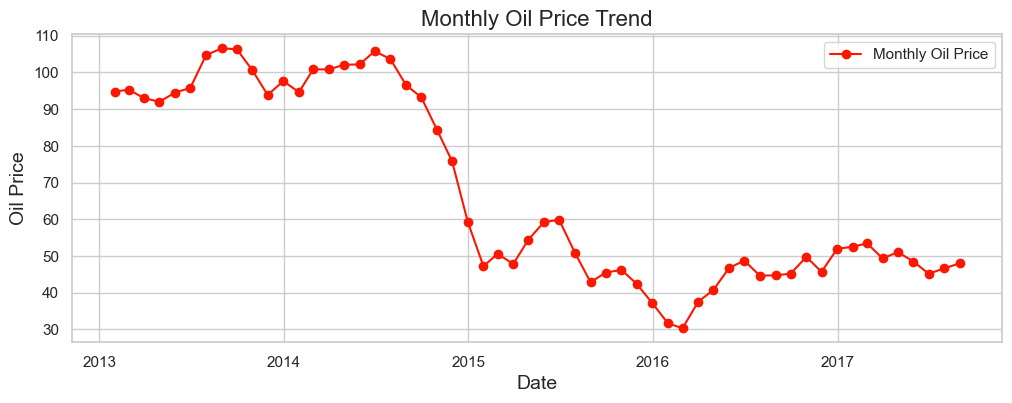

In [18]:
# Convert the 'date' column to datetime format
oil_data['date'] = pd.to_datetime(oil_data['date'])

# Resample the data to monthly frequency and calculate the mean
oil_data_monthly = oil_data.resample('M', on='date').mean()

# Set up the plot figure
plt.figure(figsize=(12, 4))

# Plotting the data with markers and custom color
plt.plot(oil_data_monthly.index, oil_data_monthly['dcoilwtico'], marker='o', color="#fc1703", label='Monthly Oil Price')

# Adding title and axis labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Oil Price', fontsize=14)
plt.legend(fontsize=11)
plt.title('Monthly Oil Price Trend', fontsize=16);


### Store Type Distribution

The provided code generates a bar plot to visualize the distribution of different store types using the 'Stores Data' dataset.

#### What the Plot Shows:

The plot showcases the distribution of store types within the dataset. Each bar corresponds to a specific store type, and the height of the bar indicates the count of stores belonging to that type. The x-axis represents the store types, and the y-axis represents the count of stores. This visualization offers a quick overview of the composition of store types in the dataset, allowing you to understand how many stores fall under each category.

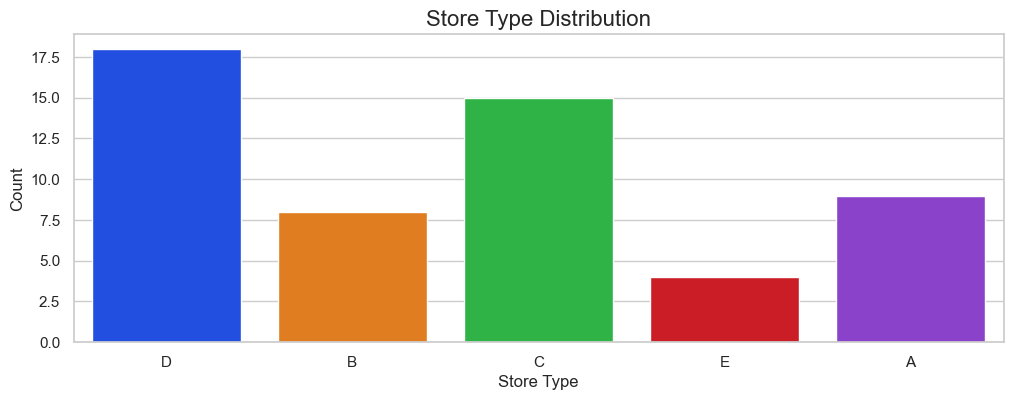

In [19]:
# Stores Data: Bar plot for store types
plt.figure(figsize=(12, 4))

sns.countplot(data=stores_data, x='type', palette="bright")
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.title('Store Type Distribution', fontsize=16)
plt.xticks(rotation=0);



* **Store Type A:** This could represent a particular category of stores that share certain characteristics, such as location, size, or product range.

* **Store Type B:** Similar to Type A, Store Type B might signify a different category of stores with its own set of attributes.

* **Store Type C:** Continuing the pattern, Store Type C could represent yet another distinct category of stores.

* **Store Type D:** Similar to the above, Store Type D likely represents another category with unique characteristics.

* **Store Type E:** Likewise, Store Type E probably signifies a separate category of stores.

### Monthly Transactions Trend

The code generates a line plot that illustrates the trend of monthly transactions using the 'Transactions Data' dataset.

#### What the Plot Shows:

The plot visually represents the trend of monthly transactions over time. The x-axis displays the months, while the y-axis represents the total number of transactions for each month. Circular markers along the line indicate specific data points. By observing the line's trajectory, you can identify patterns or fluctuations in transaction activity throughout the dataset's timeline. This visualization provides insights into the variations in customer activity and transaction volumes over time.

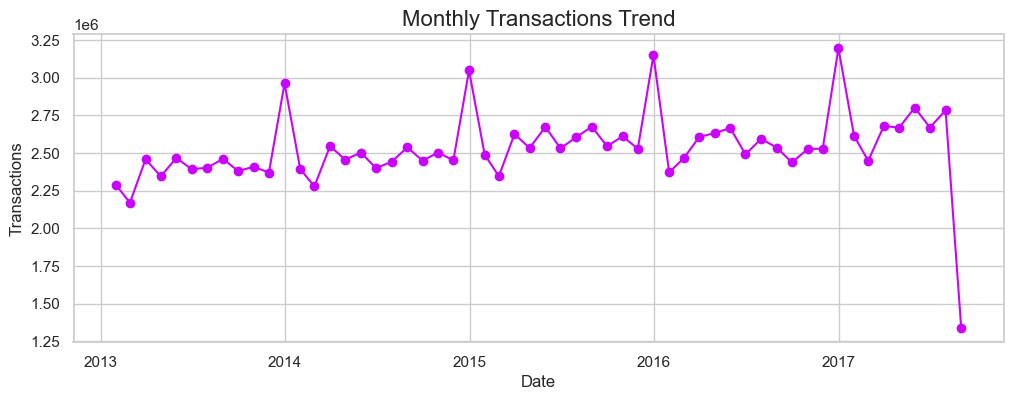

In [20]:
# Transactions Data: Line plot for transactions over time (downsampled to monthly)
transactions_data['date'] = pd.to_datetime(transactions_data['date'])
transactions_data_monthly = transactions_data.resample('M', on='date').sum()

plt.figure(figsize=(12, 4))
plt.plot(transactions_data_monthly.index, transactions_data_monthly['transactions'], marker='o', color='#ca03fc')
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.title('Monthly Transactions Trend', fontsize=16)
plt.xticks(rotation=0);



The "Monthly Transactions Trend" visualization represents the variation in the number of transactions that occur over time. It uses data from the "Transactions Data" dataset, where each entry corresponds to a particular date and the associated number of transactions at different stores. The visualization provides insights into how the volume of transactions changes throughout the dataset's time span.


<br>
<br>
<div style="border-top: 1px solid;"></div>

## Data Preprocessing 

### Handling Missing Values

I will address missing values in the provided DataFrames. I will create a function to handle missing values, track them, and fill them using appropriate strategies.

Let's start by creating a function that handles missing values in a given DataFrame. The function will:

1. Create new columns to track missing values.
2. Fill missing numeric values with the median of the column.
3. Fill missing categorical values with the string 'missing'.

In [21]:
# Create a function that fills the missing values

def fill_missing_values(df):
    """
    Fill missing values in the given DataFrame.

    Parameters:
        data (DataFrame): The DataFrame containing missing values.

    """
    print(f"Processing data...")

  
    for label, content in df.items():
        # Handling numeric columns
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Fill missing numeric values with the column's median
                df[label] = content.fillna(content.median())

        # Handling non-numeric columns
        if not pd.api.types.is_numeric_dtype(content):
            # Fill missing categorical values with 'missing'
            df[label] = df[label].fillna("missing")
     
    # Display the total count of remaining missing values
    print("Final missing value counts:")
    print(df.isna().sum())

  


I have defined the function to handle missing values. Now, let's apply it to the provided DataFrames to clean and preprocess the data.

In [22]:
# List of DataFrames
dataframes = {"Train" : train_data,
              "Holiday" : holiday_data,
              "Oil" : oil_data,
              "Stores" : stores_data,
              "Transactions" : transactions_data}

# Print names of DataFrames with missing values
for name, data in dataframes.items():
    missing_values = data.isna().any()
    if missing_values.any():
        print(f"DataFrame '{name}' has missing values.")
        fill_missing_values(data)
    
    else:
        print(f"DataFrame '{name}' has no missing values :)")
    print("-"*50)    

DataFrame 'Train' has no missing values :)
--------------------------------------------------
DataFrame 'Holiday' has no missing values :)
--------------------------------------------------
DataFrame 'Oil' has missing values.
Processing data...
Final missing value counts:
date          0
dcoilwtico    0
dtype: int64
--------------------------------------------------
DataFrame 'Stores' has no missing values :)
--------------------------------------------------
DataFrame 'Transactions' has no missing values :)
--------------------------------------------------


In [23]:



train_data.shape

(3000888, 6)

After running the code, I have successfully addressed missing values in the provided DataFrames. The function `fill_missing_values` efficiently handled missing values, and I tracked these values using additional columns. 



### Feature Engineering
I'm enhancing the dataset to help the machine learning model make better predictions. I'm going to create a function to  add new information to the existing data.

The `create_features` function enhances a DataFrame by adding new features:

 *  **Date Information:** Extracts year, month, and day details from the 'date' column.
 *  **Day of the Week:** Determines the day of the week from the date and adds it as a column.
 *  **Weekend and Weekday Indicators:** Creates flags to indicate whether a day is a weekend or weekday.
 *  **Promotion Indicator:** Adds a flag indicating whether a product is on promotion.
 *  **Promotion History:** Computes the number of promotions in the past 7 days.
 *  **Holiday Indicator:** Adds a flag for whether a day is a holiday.
 *  **Store Information:** Merges store-related details such as city, state, type, and cluster.
 *  **Oil Price:** Incorporates information about oil prices.
 *  **Transaction Count:** Calculates the number of transactions for each store and day.
 *  **Transaction Density:** Computes the ratio of transactions to sales.
 *  **Transaction Changes:** Calculates the percentage change in transaction counts

In [24]:
def create_features(df, holiday_data, stores_data, oil_data, transactions_data):
    """
    Perform feature engineering on the given DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to perform feature engineering on.
    holiday_data (pd.DataFrame): DataFrame containing holiday information.
    stores_data (pd.DataFrame): DataFrame containing store information.
    oil_data (pd.DataFrame): DataFrame containing oil price information.
    transactions_data (pd.DataFrame): DataFrame containing transaction information.
    
    Returns:
    pd.DataFrame: The DataFrame with added features.
    """
        
    # Extract date components
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df['day_of_week'] = df['date'].dt.dayofweek
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['is_weekday'] = (df['day_of_week'] < 5).astype(int)
    
    # Create binary indicator for promotions
    df['is_promotion'] = df['onpromotion'].apply(lambda x: 1 if x == 1 else 0)
    
    # Calculate rolling sum of promotions for the past 7 days
    df['promotions_last_7_days'] = df['onpromotion'].rolling(window=7).sum()
    
    # Create binary indicator for whether a promotion occurred in the past 7 days
    df['promotion_last_7_days'] = df['promotions_last_7_days'].apply(lambda x: 1 if x > 0 else 0)
    
    # Fill NaN values with 0
    df.fillna(0, inplace=True)
    
    # Create a new column 'is_holiday'
    df['is_holiday'] = 0
    
    # Update 'is_holiday' column based on holiday_data
    for date in holiday_data['date']:
        df.loc[df['date'] == date, 'is_holiday'] = 1
    
    # Merge with stores_data
    df = df.merge(stores_data[['store_nbr', 'city', 'state', 'type', 'cluster']], on='store_nbr', how='left')
    
    # Merge with oil_data
    df = df.merge(oil_data, on='date', how='left')
    
    return df


I assume that there are multiple DataFrames, each containing potentially categorical data. Additionally, I convert the 'date' column to datetime format

In [25]:
# Convert the 'date' column to datetime for DataFrames that have it
for data in dataframes.values():
    if 'date' in data.columns:
        data['date'] = pd.to_datetime(data['date'])

In [26]:
# Apply the function to train_data
train_data = create_features(train_data, holiday_data, stores_data, oil_data, transactions_data)


In [27]:
train_data.isna().sum()

id                             0
date                           0
store_nbr                      0
family                         0
sales                          0
onpromotion                    0
year                           0
month                          0
day                            0
day_of_week                    0
is_weekend                     0
is_weekday                     0
is_promotion                   0
promotions_last_7_days         0
promotion_last_7_days          0
is_holiday                     0
city                           0
state                          0
type                           0
cluster                        0
dcoilwtico                857142
dtype: int64

In [28]:
fill_missing_values(train_data)

Processing data...
Final missing value counts:
id                        0
date                      0
store_nbr                 0
family                    0
sales                     0
onpromotion               0
year                      0
month                     0
day                       0
day_of_week               0
is_weekend                0
is_weekday                0
is_promotion              0
promotions_last_7_days    0
promotion_last_7_days     0
is_holiday                0
city                      0
state                     0
type                      0
cluster                   0
dcoilwtico                0
dtype: int64


In [29]:
train_data.drop("date", axis=1, inplace=True)

In [30]:
train_data.head()

,id,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,is_weekend,is_weekday,is_promotion,promotions_last_7_days,promotion_last_7_days,is_holiday,city,state,type,cluster,dcoilwtico
0,0,1,AUTOMOTIVE,0.0,0,2013,1,1,1,0,1,0,0.0,0,1,Quito,Pichincha,D,13,53.19
1,1,1,BABY CARE,0.0,0,2013,1,1,1,0,1,0,0.0,0,1,Quito,Pichincha,D,13,53.19
2,2,1,BEAUTY,0.0,0,2013,1,1,1,0,1,0,0.0,0,1,Quito,Pichincha,D,13,53.19
3,3,1,BEVERAGES,0.0,0,2013,1,1,1,0,1,0,0.0,0,1,Quito,Pichincha,D,13,53.19
4,4,1,BOOKS,0.0,0,2013,1,1,1,0,1,0,0.0,0,1,Quito,Pichincha,D,13,53.19


### Encoding Categorical Variables

To encode categorical variables, I'll create a function.

 The `encode_cateforical_features` function:

  *  **Missing Value Tracking:** Generate new columns to monitor missing values in each column.

  *  **Numeric-to-Categorical Conversion:** Convert non-numeric columns into categorical codes, excluding the 'date' column.

  *  **Value Adjustment:** Add 1 to categorical codes to ensure a starting point from 1.



In [31]:
# Create a function that encodes the categorical variables
def encode_categorical_features(data, name):
    """
    Encode categorical features using a modified approach.
    
    Parameters:
        data (pandas.DataFrame): The DataFrame containing the data to be encoded.
    
    Returns:
        pandas.DataFrame: The DataFrame with encoded categorical features.
    """
    for label, content in data.items():
        # Handling non-numeric columns
        # Check if the data type of the column is a string (i.e., categorical data)
        if pd.api.types.is_string_dtype(content):
            data[label] = content.astype("category")
            # Convert non-numeric data into categorical codes (integers)
            data[label] = pd.Categorical(content).codes + 1
            
    print(f"Categorical variables in `{name}` data have been successfully encoded into numerical codes.")
    print("-"*100)
    return data


In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      int64  
 1   store_nbr               int64  
 2   family                  object 
 3   sales                   float64
 4   onpromotion             int64  
 5   year                    int32  
 6   month                   int32  
 7   day                     int32  
 8   day_of_week             int32  
 9   is_weekend              int32  
 10  is_weekday              int32  
 11  is_promotion            int64  
 12  promotions_last_7_days  float64
 13  promotion_last_7_days   int64  
 14  is_holiday              int64  
 15  city                    object 
 16  state                   object 
 17  type                    object 
 18  cluster                 int64  
 19  dcoilwtico              float64
dtypes: float64(3), int32(6), int64(7), object(4)
memory usage: 389.2+ MB

I proceed to encode categorical features in the train_data (excluding the 'date' column) using the `encode_categorical_features` function:

In [33]:
train_data = encode_categorical_features(train_data, 'Train')
train_data.info()

Categorical variables in `Train` data have been successfully encoded into numerical codes.
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      int64  
 1   store_nbr               int64  
 2   family                  int8   
 3   sales                   float64
 4   onpromotion             int64  
 5   year                    int32  
 6   month                   int32  
 7   day                     int32  
 8   day_of_week             int32  
 9   is_weekend              int32  
 10  is_weekday              int32  
 11  is_promotion            int64  
 12  promotions_last_7_days  float64
 13  promotion_last_7_days   int64  
 14  is_holiday              int64  
 15  city                    int8   
 16  state                   

### Data Splitting

Before modeling, I'll split the data into training, validation, and possibly testing sets. This ensures we have separate data for each phase.

In [34]:
# Split data into X & y
X = train_data.drop('sales', axis=1)[:100000]
y = train_data['sales'][:100000]

# Displaying the shapes of X and y
X.shape, y.shape

((100000, 19), (100000,))

I'm going to train the model with a smaller amount of data initially and then attempt to improve the score. After that, I'll train the model using all of the available data.

In [35]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, train_size=0.2)

# Displaying the shapes of the training and validation sets
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20000, 19), (80000, 19), (20000,), (80000,))

<br>
<br>
<div style="border-top: 1px solid;"></div>

## Modeling

### Evaluate and Train Model

I will assess how well the initial model performs after training. I'll use metrics to measure its performance. If needed, I will adjust the model's parameters and train it again to improve its accuracy.

I'm going to try 5 diffirent machine learning models:

  *  **Linear Regression (LR):** Predicts values by drawing a straight line that best fits the data points. It's a simple and interpretable model.

  *  **Decision Tree Regressor (DTR):** Makes decisions using a tree-like structure, asking questions about features to predict values. It's easy to understand but can lead to overfitting.

  *  **RandomForest Regressor (RFR):** Constructs multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.


In [36]:
# Define the base models
base_models = {
    "LR": LinearRegression(),
    "DTR": DecisionTreeRegressor(),
    "RFR": RandomForestRegressor()
}

The `fit_metrics_model` function:
 *  Trains and evaluates multiple machine learning models.
  *  Calculates metrics like MAE and R-squared.
  *  Takes model instances, training, and validation data.
  *  Returns a summary DataFrame with metrics for each model.

In [37]:
def fit_metrics_model(models, X_train, X_val, y_train, y_val):
    """
    Train and evaluate multiple models using different metrics.

    Parameters:
        models (dict): A dictionary of model instances with their names as keys.
        X_train (pd.DataFrame): Training features.
        X_val (pd.DataFrame): Validation features.
        y_train (pd.Series): Training target.
        y_val (pd.Series): Validation target.

    Returns:
        pd.DataFrame: A DataFrame containing evaluation metrics for each model.
    """
    metrics = {}

    # Loop through each model and evaluate its performance
    for name, model in models.items():
        print(f"Fitting and evaluating {name} model...")

        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on both training and validation data
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_val)

        # Calculate evaluation metrics for the model
        metrics[name] = {
            "Training MAE" : mean_absolute_error(y_train, train_preds),
            "Valid MAE" : mean_absolute_error(y_val, val_preds),
            "Training R^2" : r2_score(y_train, train_preds),
            "Valid R^2" : r2_score(y_val, val_preds)}
          
    
    # Create a DataFrame to store the evaluation results
    return pd.DataFrame(metrics).T

In [38]:
%%time
base_models_evaluations = fit_metrics_model(base_models, X_train, X_val, y_train, y_val)
base_models_evaluations

Fitting and evaluating LR model...
Fitting and evaluating DTR model...
Fitting and evaluating RFR model...
CPU times: total: 12.6 s
Wall time: 14.2 s


,Training MAE,Valid MAE,Training R^2,Valid R^2
LR,277.451171,278.613710,0.041263,0.045205
DTR,0.000000,52.051788,1.000000,0.819916
RFR,16.046609,41.559210,0.978628,0.909707


   * **Training MAE:** The average absolute difference between predicted and actual values on the training data. Lower is better.

   * **Valid MAE:** Same as Training MAE, but measured on the validation data. A good model should have similar MAE for training and validation.

   * **Training R^2:** The proportion of variance in the target explained by the model on the training data. Closer to 1 is better.

   * **Valid R^2:** Same as Training R^2, but measured on the validation data. Indicates model's generalization ability.


### Visualizing Model Comparison

I will visualize the comparison of the models' performance using a bar chart. Each bar represents a model, and different evaluation metrics are represented using distinct colors.


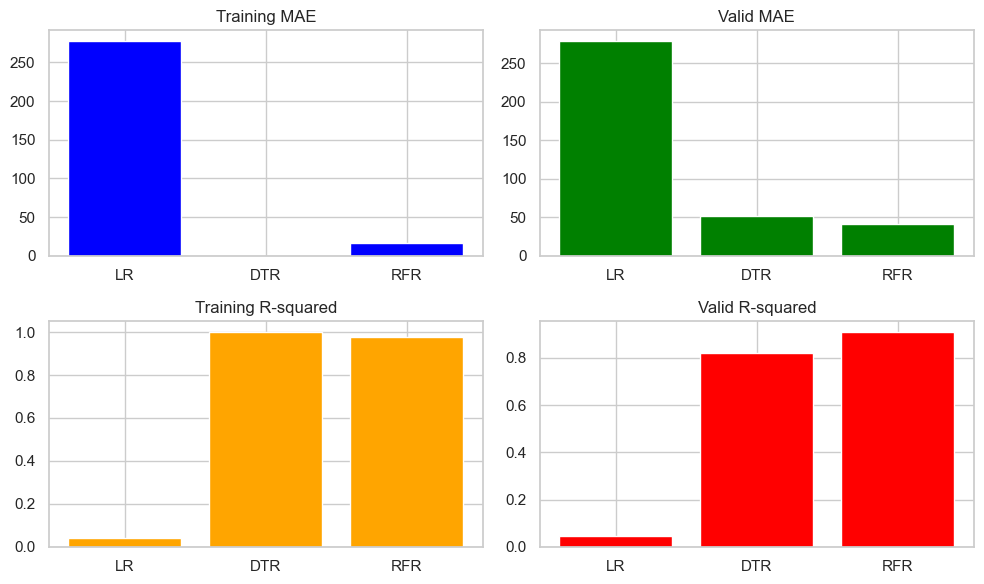

In [39]:
# Model names
models = base_models_evaluations.index

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Plot Training MAE
axs[0, 0].bar(models, base_models_evaluations["Training MAE"], color='blue')
axs[0, 0].set_title('Training MAE')

# Plot Valid MAE
axs[0, 1].bar(models, base_models_evaluations["Valid MAE"], color='green')
axs[0, 1].set_title('Valid MAE')

# Plot Training R-squared
axs[1, 0].bar(models, base_models_evaluations["Training R^2"], color='orange')
axs[1, 0].set_title('Training R-squared')

# Plot Valid R-squared
axs[1, 1].bar(models,base_models_evaluations["Valid R^2"], color='red')
axs[1, 1].set_title('Valid R-squared')

# Adjust layout
plt.tight_layout()

I might want to use the `Decision Tree Regressor (DTR)` because it has very low errors and explains data well, making it a good choice for my task.I want to make the Decision Tree Regressor model perform even better, and I plan to do this by using a technique called `RandomSearchCV`.

### Hyperparameter Optimization

I will now perform hyperparameter optimization to fine-tune the model's settings and improve its performance. The RandomizedSearchCV technique is used to explore different combinations of hyperparameters.

The following hyperparameters will be explored:
Certainly, here's a more concise explanation of the hyperparameters:

  -  `max_depth:` Controls how deep the decision tree can grow. You're testing depths of None (unlimited), 10, 20, and 30.

  -  `min_samples_split:` Sets the minimum samples required to split a node. Higher values can prevent overfitting.

   - `min_samples_leaf:` Defines the minimum samples in a leaf node. It helps prevent tiny branches.

  -  `max_features:` Limits the number of features considered for splitting. Options are 'auto,' 'sqrt,' 'log2,' and None (all features).

   -  `criterion: `Measures split quality. Options are 'mse' (mean squared error), 'friedman_mse,' 'mae' (mean absolute error), and 'poisson.'

   - ` splitter:` Chooses the split strategy. 'best' selects the best split, 'random' chooses a random best split.

  -  `min_weight_fraction_leaf:` Sets the minimum weighted samples for a leaf node (used for weighted data).

  -  `random_state:` Controls randomness for reproducibility. You're testing None, 42, and 1001.

  - ` presort:` Speeds up training by pre-sorting data (boolean).




In [47]:
# Define the grid of hyperparameters to search
param_dict = {
    'max_depth': [None, 10, 20, 30],         
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4],            
    'max_features': ['auto', 'sqrt', 'log2', None], 
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'], 
    'splitter': ['best', 'random'],            
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],  
    'random_state': [None, 42, 1001]
}


In [48]:
%%time
# Create a Random Forest Classifier model
model = DecisionTreeRegressor(random_state=42)

# Create the RandomizedSearchCV object
random_search =  RandomizedSearchCV(model ,  
                                    param_distributions=param_dict,
                                    n_iter=100, 
                                    cv=5,  
                                    verbose=True)


# Fit the randomized search to the data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 4.03 s
Wall time: 4.54 s


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2],
                                        'random_state': [None, 42, 1001],
                                        'splitter': ['best', 'random']},
                   verbose=True)

In [49]:
# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'splitter': 'random', 'random_state': None, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'friedman_mse'}
Best Score: 0.7141615480938249


#### Training the Ideal Model with the Entire Dataset

I'm now ready to train the model using the entire dataset for comprehensive learning and prediction.

In [50]:
# Get the bestRandomForestRegressorgressorgressorr Logistic Regression
best_params = random_search.best_params_

# Create a Logistic Regression model with the best params
ideal_model = DecisionTreeRegressor(**best_params)

In [51]:
# Train the model with all the data 
# Split data into X & y
X = train_data.drop('sales', axis=1)
y = train_data['sales']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, train_size=0.2)
X.shape

(3000888, 19)

In [52]:
%%time
ideal_model.fit(X_train, y_train)

CPU times: total: 2.56 s
Wall time: 2.66 s


DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=2,
                      min_samples_split=10, splitter='random')

In [53]:
np.sqrt(mean_squared_log_error(y_val, ideal_model.predict(X_val)))

0.654985795147849

### Feature Importance
I will perform feature importance analysis to understand the significance of each feature in our dataset. Feature importance analysis is crucial in machine learning, as it helps me identify which features have the most impact on the model's predictions. I am going to create a function for that.

The `plot_features` function:
   * Visualizes feature importances using a bar plot.
   * Takes two parameters: columns (a list of feature names) and importances (a list of feature importances).
   * Sorts and plots features by importance, helping identify influential features in a machine learning model's predictions.

In [54]:
def plot_features(columns, importances):
    df = pd.DataFrame({"features": columns,
                       "features_importances": importances})
    df_sorted = df.sort_values("features_importances", ascending=False).reset_index(drop=True)
    
    # Set up the plot
    plt.figure(figsize=(10, 4))
    sns.barplot(x="features_importances", y="features", data=df_sorted, palette="viridis")
    
    # Customize the plot
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.title(f" Important Features")
    
    plt.show()

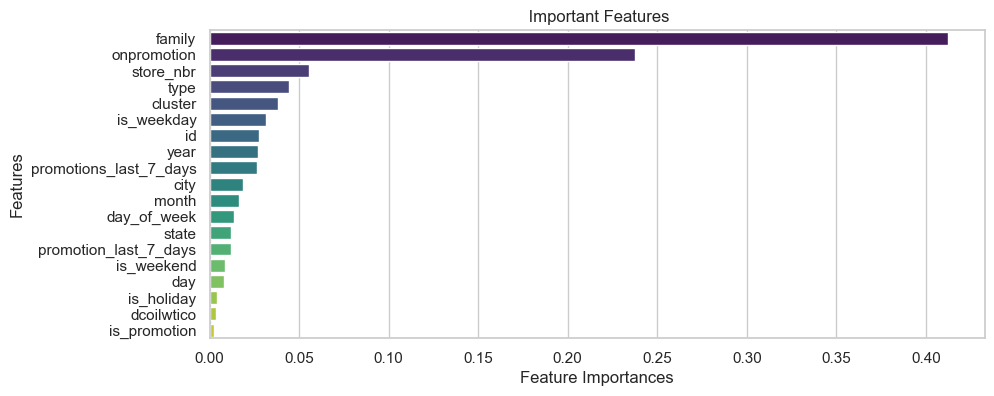

In [55]:
plot_features(X_train.columns, ideal_model.feature_importances_)

<br>
<br>
<div style="border-top: 1px solid;"></div>

## Predicting Sales for Various Product Families

I will guide you through the process of preparing the data and predicting sales for different product families. My goal is to use the trained ideal model to make predictions about the sales of various product families based on the features in the dataset.

### Loading and Exploring the Test Data
1. **Data Loading:** I start by loading the details of these passengers from the "test.csv" file.

2. **Preparation:** I preprocess the data, addressing missing values and converting categorical features for accurate predictions.

3. **Feature Scaling:** To ensure consistent predictions, I scale the features appropriately.

4. **Prediction:** Leveraging the trained `ideal_model`, I predict the transported status for each remaining passenger.

5. **Result Creation:** I compile these predictions into a DataFrame named `result_df`.

6. **Display:** I present the initial predictions, providing an overview.


In [56]:
# Load the test data for prediction
test_data = pd.read_csv("sales-time-forecast-datasets/test.csv")
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [57]:
# Display information about the data types and missing values in the test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [58]:
# Convert the date column to datetime
test_data['date'] = pd.to_datetime(test_data['date'])

In [59]:
# Creating new features with the create features function 
test_data = create_features(test_data, holiday_data, stores_data, oil_data, transactions_data)
test_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'year', 'month',
       'day', 'day_of_week', 'is_weekend', 'is_weekday', 'is_promotion',
       'promotions_last_7_days', 'promotion_last_7_days', 'is_holiday', 'city',
       'state', 'type', 'cluster', 'dcoilwtico'],
      dtype='object')

In [60]:
# Fill the missing values with the function i wrote above
fill_missing_values(test_data)


Processing data...
Final missing value counts:
id                        0
date                      0
store_nbr                 0
family                    0
onpromotion               0
year                      0
month                     0
day                       0
day_of_week               0
is_weekend                0
is_weekday                0
is_promotion              0
promotions_last_7_days    0
promotion_last_7_days     0
is_holiday                0
city                      0
state                     0
type                      0
cluster                   0
dcoilwtico                0
dtype: int64


In [61]:
# Delete the date column
test_data.drop("date", axis=1, inplace=True)

In [62]:
# Check the shape of test data
test_data.shape

(28512, 19)

In [63]:
# Check the shape of train data
X_train.shape

(600177, 19)

As both dataframes share the same column, I can proceed to encode the categorical features, thereby preparing the data for prediction.

In [64]:
test_data = encode_categorical_features(test_data, "Test")

Categorical variables in `Test` data have been successfully encoded into numerical codes.
----------------------------------------------------------------------------------------------------


In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      28512 non-null  int64  
 1   store_nbr               28512 non-null  int64  
 2   family                  28512 non-null  int8   
 3   onpromotion             28512 non-null  int64  
 4   year                    28512 non-null  int32  
 5   month                   28512 non-null  int32  
 6   day                     28512 non-null  int32  
 7   day_of_week             28512 non-null  int32  
 8   is_weekend              28512 non-null  int32  
 9   is_weekday              28512 non-null  int32  
 10  is_promotion            28512 non-null  int64  
 11  promotions_last_7_days  28512 non-null  float64
 12  promotion_last_7_days   28512 non-null  int64  
 13  is_holiday              28512 non-null  int64  
 14  city                    28512 non-null

In [66]:
test_data.head()

,id,store_nbr,family,onpromotion,year,month,day,day_of_week,is_weekend,is_weekday,is_promotion,promotions_last_7_days,promotion_last_7_days,is_holiday,city,state,type,cluster,dcoilwtico
0,3000888,1,1,0,2017,8,16,2,0,1,0,0.0,0,0,19,13,4,13,46.8
1,3000889,1,2,0,2017,8,16,2,0,1,0,0.0,0,0,19,13,4,13,46.8
2,3000890,1,3,2,2017,8,16,2,0,1,0,0.0,0,0,19,13,4,13,46.8
3,3000891,1,4,20,2017,8,16,2,0,1,0,0.0,0,0,19,13,4,13,46.8
4,3000892,1,5,0,2017,8,16,2,0,1,0,0.0,0,0,19,13,4,13,46.8


### Making Predictions for Product Families

Now, I'm utilizing the previously trained model to make predictions regarding the product families. By providing the model with the available information on these product families, it assists me in making informed guesses about their sales outcomes. This process helps fill in the missing pieces of the sales story and provides insights into what might have transpired during the sales journey.

In [67]:
# Predict test data
predicted_sales = ideal_model.predict(test_data)

In [68]:
# Create a DataFrame to hold the results
result_df  = pd.DataFrame()

# Extract PassengerId from passenger_data_test and add it to the DataFrame
result_df["id"] = np.array(test_data['id'])

# Add the predictions of transported status to the DataFrame
result_df["sales"] = predicted_sales

# Display the first few rows of the resulting DataFrame
result_df.head()

,id,sales
0,3000888,4.875000
1,3000889,0.000000
2,3000890,3.250000
3,3000891,893.666667
4,3000892,0.000000


In [69]:
result_df.to_csv("sales-time-forecast-datasets/sales_predictions.csv", index=False)